In [11]:
import numpy
from matplotlib import pyplot
import ipywidgets as ipyw
%matplotlib inline

In [12]:
# Set the font family and size to use for Matplotlib figures.
pyplot.rcParams['font.family'] = 'serif'
pyplot.rcParams['font.size'] = 16

In [13]:
def rho_red_light(x,rho_max):
    rho = numpy.full_like(x,rho_max)
    #rho = rho_max * numpy.ones_like(x)
    mask = numpy.where(x < 3.0)
    rho[mask] /= 2 
    #rho[mask] = 0.5 * rho_max
    return rho

In [14]:
# Set parameters.
nx = 81  # number of locations on the road
L = 4.0  # length of the road
dx = L / (nx - 1)  # distance between two consecutive locations
nt = 40  # number of time steps to compute
rho_max = 10.0  # maximum taffic density allowed
u_max = 1.0  # maximum speed traffic

# Get the road locations.
x = numpy.linspace(0.0, L, num=nx)

# Compute the initial traffic density.
rho0 = rho_red_light(x, rho_max)


In [15]:
def plot(n,x,rho_hist):

    pyplot.figure()
    pyplot.title('Time Step:{}'.format(n))
    pyplot.xlabel('road')
    pyplot.ylabel('density')
    pyplot.grid()
    #pyplot.plot(x, rho_hist[0],label='initial')
    pyplot.plot(x, rho_hist[n],label='current')
    pyplot.xlim(x[0],x[-1])
    pyplot.ylim(4.0,11.0)
    #pyplot.legend(loc='upper right')
    
    pyplot.show()

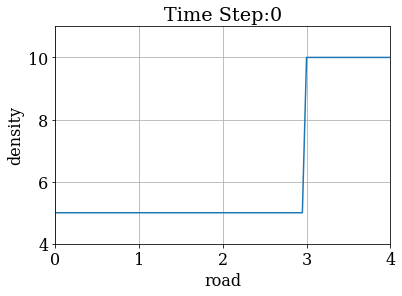

In [16]:
plot(0,x,[rho0])

In [17]:
def traffic_speed(rho,u_max,rho_max):
    return u_max*(1-rho/rho_max)
def traffic_flux(rho,u_max,rho_max):
    return rho * traffic_speed(rho,u_max,rho_max)

In [18]:
def interactive_plot(x,rho_hist):
    nt = len(rho_hist) - 1
    nt_slider = ipyw.IntSlider(value=0,min=0,max=nt,step=1,description='time step')
    
    w = ipyw.interactive(plot, n=nt_slider,
                         x=ipyw.fixed(x),
                         rho_hist=ipyw.fixed(rho_hist))
    return w

In [19]:
interactive_plot(x,[rho0])

interactive(children=(IntSlider(value=0, description='time step', max=0), Output()), _dom_classes=('widget-int…

In [40]:
def lax_friedrichs(rho0,nt,dt,dx,u_max,rho_max):
    rho_hist=[rho0.copy()]
    rho = rho0.copy()
    nx=len(rho0)
    nx=rho0.size
    for n in range(nt):
        F=traffic_flux(rho,u_max,rho_max)
        rho[1:-1] = (0.5 * (rho[:-2] + rho[2:]) -
                     dt / (2.0 * dx) * (F[2:] - F[:-2]))
        #for i in range(1,nx-1):
            #rho(i)=(0.5 * (rho[i-1] + rho[i+1) -
                     #dt / (2.0 * dx) * (F[i+1] - F[I-1]))
        rho_hist.append(rho.copy())
    return rho_hist

In [45]:
sigma = 1.0
dt = sigma * dx / u_max  # time-step size
rho_hist=lax_friedrichs(rho0,nt,dt,dx,u_max,rho_max)

In [46]:
interactive_plot(x,rho_hist)

interactive(children=(IntSlider(value=0, description='time step', max=40), Output()), _dom_classes=('widget-in…

In [47]:
sigma = 0.5
dt = sigma * dx / u_max  # time-step size
nt=80
rho_hist=lax_friedrichs(rho0,nt,dt,dx,u_max,rho_max)
interactive_plot(x,rho_hist)

interactive(children=(IntSlider(value=0, description='time step', max=80), Output()), _dom_classes=('widget-in…

In [52]:
def traffic_jacobian(rho, u_max, rho_max):
    J = u_max * (1.0 - 2.0 * rho / rho_max)
    return J

def lax_wendroff(rho0,nt,dt,dx,u_max,rho_max):
    rho_hist=[rho0.copy()]
    rho = rho0.copy()
    nx=len(rho0)
    nx=rho0.size
    for n in range(nt):
        F=traffic_flux(rho,u_max,rho_max)
        J=traffic_jacobian(rho,u_max,rho_max)
        rho[1:-1] = (rho[1:-1] -
                     dt / (2.0 * dx) * (F[2:] - F[:-2]) +
                     dt**2 / (4.0 * dx**2) *
                     ((J[1:-1] + J[2:]) * (F[2:] - F[1:-1]) -
                      (J[:-2] + J[1:-1]) * (F[1:-1] - F[:-2])))
        #for i in range(1,nx-1):
            #rho(i)=(0.5 * (rho[i-1] + rho[i+1) -
                     #dt / (2.0 * dx) * (F[i+1] - F[I-1]))
        rho_hist.append(rho.copy())
    return rho_hist

In [58]:
sigma = 0.5
dt = sigma * dx / u_max  # time-step size
nt=80
rho_hist=lax_wendroff(rho0,nt,dt,dx,u_max,rho_max)
interactive_plot(x,rho_hist)

interactive(children=(IntSlider(value=0, description='time step', max=80), Output()), _dom_classes=('widget-in…